In [56]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib import collections  as mc
import numpy as np
import cv2

In [57]:
data_openpose = np.load('../VideoPose3D/data_federer_openpose.npz', allow_pickle=True)
data_detectron = np.load('data_2d_custom_federer.npz', allow_pickle=True)

In [65]:
kp_detectron = data_detectron['positions_2d'].item()['video.mp4']['custom'][0]
kp_openpose = data_openpose['positions_2d'].item()['federer_openpose']['custom'][0]

In [60]:
kp_dict = dict(data_openpose)
positions = kp_dict['positions_2d'].item()
positions['federer_openpose']['custom'] = [kp_openpose]
kp_dict['positions'] = positions
np.savez('../VideoPose3D/data_federer_openpose_interpolated.npz', **kp_dict)


In [59]:
# interpolate missing keypoints in openpose
indices = np.arange(len(kp_openpose))

for i in range(17):
    for j in range(2):                                                                    
        mask = np.where(kp_openpose[:, i, j] != 0)[0]
        kp_openpose[:, i, j] = np.interp(indices, indices[mask], kp_openpose[:, i, j][mask])

In [35]:
plt.ioff()

cap = cv2.VideoCapture('video.mp4')
for i in range(300):
    ret, frame = cap.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
    ax1.imshow(frame)
    ax2.imshow(frame)

    ax1.set_title('openpose')
    ax2.set_title('detectron')

    xs_openpose = kp_openpose[i][:, 0]
    ys_openpose = kp_openpose[i][:, 1]

    xs_detectron = kp_detectron[i][:, 0]
    ys_detectron = kp_detectron[i][:, 1]

    ax1.scatter(xs_openpose, ys_openpose, c='r')
    ax2.scatter(xs_detectron, ys_detectron, c='r')
    
    fig.savefig('inspect/' + str(i) + '.png')
    plt.close(fig)
    
cap.release()

In [5]:
plt.clf()

<Figure size 432x288 with 0 Axes>

In [9]:
xs_lear = kp_openpose[:, 3, 0]

In [15]:
xs_lear

array([   0.     ,    0.     ,    0.     ,    0.     ,    0.     ,
          0.     ,    0.     ,    0.     ,    0.     ,    0.     ,
          0.     ,    0.     ,    0.     ,    0.     ,    0.     ,
          0.     ,    0.     ,    0.     ,    0.     ,    0.     ,
          0.     ,    0.     ,    0.     ,    0.     ,    0.     ,
          0.     ,    0.     ,    0.     ,    0.     ,    0.     ,
          0.     ,    0.     ,    0.     ,    0.     ,    0.     ,
          0.     ,    0.     ,    0.     ,    0.     ,    0.     ,
          0.     ,    0.     ,    0.     ,    0.     ,    0.     ,
          0.     ,    0.     ,    0.     ,    0.     ,    0.     ,
          0.     ,    0.     ,    0.     ,    0.     ,    0.     ,
          0.     ,    0.     ,    0.     ,    0.     ,    0.     ,
          0.     ,    0.     ,    0.     ,    0.     ,    0.     ,
          0.     ,    0.     ,    0.     ,    0.     ,    0.     ,
          0.     ,    0.     ,    0.     ,    0.     ,    0.  

In [49]:
xvals = np.where(xs_lear != 0)[0]

indices = np.arange(len(xs_lear))

y_interp = np.interp(indices, indices[xvals], xs_lear[xvals])

In [1]:
y_interp.shape

NameError: name 'y_interp' is not defined

In [48]:
indices[xvals]

array([114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 156, 157, 214, 273])

In [47]:
xs_lear[xvals]

array([ 954.09503,  954.0816 ,  954.27594,  957.0951 ,  957.09766,
        957.15955,  959.9468 ,  959.9469 ,  962.88696,  968.8378 ,
        968.8202 ,  968.87805,  971.72437,  971.719  ,  974.5422 ,
        974.6285 ,  974.63617,  974.6936 ,  974.745  ,  974.7473 ,
        977.5511 ,  977.6764 ,  977.67456,  977.8027 ,  980.6622 ,
        980.66345,  986.4748 ,  989.4199 ,  989.4215 ,  992.38434,
        995.2637 ,  995.2639 ,  998.08545,  998.21356,  998.21344,
        998.30365,  998.34515,  998.345  , 1001.0361 ,  998.3271 ,
        998.3298 , 1001.1956 , 1001.2012 ,  951.1419 ,  954.0274 ],
      dtype=float32)

In [28]:
np.where(xs_lear != 0)[0]

array([114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 156, 157, 214, 273])

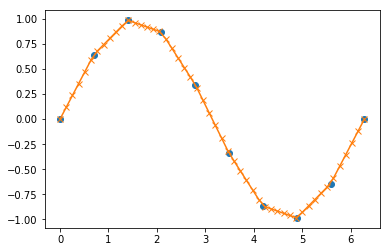

In [30]:
x = np.linspace(0, 2*np.pi, 10)
y = np.sin(x)
xvals = np.linspace(0, 2*np.pi, 50)
yinterp = np.interp(xvals, x, y)
import matplotlib.pyplot as plt
plt.plot(x, y, 'o')

plt.plot(xvals, yinterp, '-x')

plt.show()

In [32]:
x

array([0.        , 0.6981317 , 1.3962634 , 2.0943951 , 2.7925268 ,
       3.4906585 , 4.1887902 , 4.88692191, 5.58505361, 6.28318531])

In [33]:
y

array([ 0.00000000e+00,  6.42787610e-01,  9.84807753e-01,  8.66025404e-01,
        3.42020143e-01, -3.42020143e-01, -8.66025404e-01, -9.84807753e-01,
       -6.42787610e-01, -2.44929360e-16])

In [34]:
xvals

array([0.        , 0.12822827, 0.25645654, 0.38468481, 0.51291309,
       0.64114136, 0.76936963, 0.8975979 , 1.02582617, 1.15405444,
       1.28228272, 1.41051099, 1.53873926, 1.66696753, 1.7951958 ,
       1.92342407, 2.05165235, 2.17988062, 2.30810889, 2.43633716,
       2.56456543, 2.6927937 , 2.82102197, 2.94925025, 3.07747852,
       3.20570679, 3.33393506, 3.46216333, 3.5903916 , 3.71861988,
       3.84684815, 3.97507642, 4.10330469, 4.23153296, 4.35976123,
       4.48798951, 4.61621778, 4.74444605, 4.87267432, 5.00090259,
       5.12913086, 5.25735913, 5.38558741, 5.51381568, 5.64204395,
       5.77027222, 5.89850049, 6.02672876, 6.15495704, 6.28318531])